# Pandas

In [5]:
import pandas as pd
import numpy as np

## Creating data

In [6]:
filename = './pandasData.csv'
with open(filename, "w") as f:
    f.write("x;y\n")
    x = np.random.normal(0, 2, 1000)
    y = np.random.normal(100, 10, 1000)
    for i in range(1000):
        line = "%d; %d \n" % (x[i], y[i])
        f.write(line)

## Getting data

In [7]:
data = pd.read_csv(filename, sep=';')
data.head(10)

,x,y
0,1,99
1,1,123
2,0,91
3,0,109
4,1,83
5,0,104
6,0,103
7,1,95
8,-4,100
9,0,108


## Queries and filter

In [8]:
data[data['y'] > 120]
data.query('y > 120')

,x,y
1,1,123
79,0,122
116,0,122
144,0,121
187,-1,124
200,0,127
257,0,123
296,-3,125
520,0,127
596,-1,122


In [9]:
data['y'].sum()

99459

In [10]:
data[:20]

,x,y
0,1,99
1,1,123
2,0,91
3,0,109
4,1,83
5,0,104
6,0,103
7,1,95
8,-4,100
9,0,108


## Pandas plot

In [11]:
data['y'].plot()


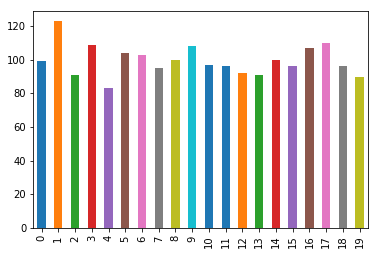

In [12]:
data[:20]['y'].plot(kind='bar')

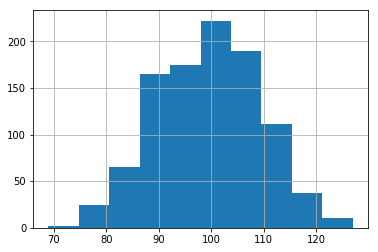

In [13]:
data['y'].hist()

# Data Manipulation with Pandas

In [14]:
# Default configuration for using auto completion with tab key
%config IPCompleter.greedy=True

In [15]:
import pandas
pandas.__version__

'0.22.0'

In [16]:
import pandas as pd 
# provides an efficient implementation of a DataFrame. DataFrames 
# multidimensional arrays with attached row and column labels

In [17]:
pd?

In [18]:
pd.*?

## The Pandas Series Object

In [19]:
import numpy as np

data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [20]:
data.values # NumPy array

array([0.25, 0.5 , 0.75, 1.  ])

In [21]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [22]:
data[1] # like with NumPy

0.5

In [23]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### Series as generalized NumPy array

In [24]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [25]:
data['b']

0.5

In [26]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7]) # non sequential indices
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

### Series as specialized dictionary

In [27]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [28]:
population['California']

38332521

In [29]:
population['California':'Illinois'] # like indices

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects

In [30]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [31]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [32]:
pd.Series({2:'a', 1:'b', 3:'c'})


1    b
2    a
3    c
dtype: object

In [33]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

## The Pandas DataFrame Object

### DataFrame as a generalized NumPy array

If a *Series* is an analog of a one-dimensional array with flexible indices, a *DataFrame* is an analog of a two-dimensional array with both flexible row indices and flexible column names.

A *DataFrame* can be represented as a sequence of aligned *Series* objects

In [34]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area # new Series listing the area of each of the five states

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [35]:
states = pd.DataFrame({'population': population,
                       'area': area})
states # data frame which contains area and population of each state

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [36]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [37]:
states.columns

Index(['area', 'population'], dtype='object')

### DataFrame as specialized dictionary

In [38]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

### Constructing DataFrame objects
#### From a single Series object

In [39]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


#### From a list of dicts

In [40]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [41]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

In [42]:
pd.DataFrame({'population': population,
              'area': area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


#### From a two-dimensional NumPy array

In [43]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.795620,0.815341
b,0.055344,0.175796
c,0.190863,0.916420


#### From a NumPy structured array

In [44]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [45]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## The Pandas Index Object

In [46]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

In [47]:
ind[1] # Index as immutable array


3

In [48]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [49]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [50]:
ind[1] = 0

TypeError: Index does not support mutable operations

### Index as ordered set

In [51]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [52]:
indA & indB  # intersection

Int64Index([3, 5, 7], dtype='int64')

In [53]:
indA | indB  # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [54]:
indA ^ indB  # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

## Data Indexing and Selection

### Data Selection in Series

#### Series as dictionary

In [55]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [56]:
data['b']

0.5

In [57]:
'a' in data # examine keys/indices and values

True

In [58]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [59]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [60]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### Series as one-dimensional array

In [61]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [62]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [63]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [64]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

#### Indexers: loc, iloc, and ix

In [117]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [118]:
# explicit index when indexing
data[1]

'a'

In [119]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [120]:
data.loc[1]

'a'

In [121]:
# loc attribute allows indexing and slicing that always references the explicit index
data.loc[1:3]

1    a
3    b
dtype: object

In [122]:
data.iloc[1] # index value

'b'

In [123]:
#  iloc attribute allows indexing and slicing that always references the implicit Python-style index
data.iloc[1:3] # index location

3    b
5    c
dtype: object

In [124]:
data.iloc[0:2]

1    a
3    b
dtype: object

### Data Selection in DataFrame

#### DataFrame as a dictionary

In [125]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [126]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [127]:
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [128]:
data.area is data['area']

True

In [129]:
data.pop is data['pop'] # like Pandas has pop function it does not work


False

In [130]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### DataFrame as two-dimensional array

In [131]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01]])

In [132]:
data.T # swap rows and columns

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [133]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [134]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [135]:
# first three row indices and first two cols indices
data.iloc[:3, :2] # using indices 


,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [136]:
data.loc[:'Illinois', :'pop'] # using indices values

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [137]:
data.ix[:3, :'pop'] # hybrid approach using indices and indices values
# deprecated?

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [138]:
# loc indexer we can combine masking and fancy indexing as in the following
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [139]:
data.iloc[0, 2] = 90 # change value
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### Additional indexing conventions

In [140]:
# slices by row indices
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [141]:
# slices can also refer to rows by number rather than by index
data[1:3]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [142]:
data[data.density > 100] # masking

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


## Operating on Data in Pandas

### Ufuncs: Index Preservation

In [1]:
import pandas as pd
import numpy as np

In [3]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [4]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [5]:
np.exp(ser) # appli NumPy UFunc on Pandas Series object

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [7]:
np.sin(df * np.pi / 4) # UFunc on Pandas DataFrame object

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


###  UFuncs: Index Alignment

#### Index alignment in Series

In [8]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [9]:
population / area # Union of indices (NaN ==> Missing data)

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [10]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [11]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [16]:
 # add NumPy fill missing values by value of the indices on specific Serie
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

#### Index alignment in DataFrame

In [20]:
# using list for col names
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,17,3
1,13,17


In [19]:
# using list for col names
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,3,8,2
1,4,2,6
2,4,8,6


In [21]:
A + B # default operator

,A,B,C
0,25.0,6.0,NaN
1,15.0,21.0,NaN
2,NaN,NaN,NaN


In [27]:
# fill with the mean of all values in A (computed by first stacking the rows of A)
fill = A.stack().mean()
A.add(B, fill_value=fill)

# How it is computed ? (Here example with current generator)
# (17 + 3 + 17 + 13) / 4 = 12.5 (mean of A)
# [0, C] = 12.5 + B[0,C] = 12.5 + 2 = 14.5
# [1, C] = 12.5 + B[1,C] = 12.5 + 6 = 18.5
# [2, C] = 12.5 + B[2,C] = 12.5 + 6 = 18.5
# [2, B] = 12.5 + B[2,B] = 12.5 + 4 = 16.5
# [2, A] = 12.5 + B[2,A] = 12.5 + 8 = 20.5

,A,B,C
0,25.0,6.0,14.5
1,15.0,21.0,18.5
2,20.5,16.5,18.5


### Ufuncs: Operations Between DataFrame and Series

In [28]:
A = rng.randint(10, size=(3, 4))
A

array([[9, 8, 9, 4],
       [1, 3, 6, 7],
       [2, 0, 3, 1]])

In [30]:
# difference of a two-dimensional array and one of its rows
# NumPy array example
A - A[0]

array([[ 0,  0,  0,  0],
       [-8, -5, -3,  3],
       [-7, -8, -6, -3]])

In [33]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-8,-5,-3,3
2,-7,-8,-6,-3


In [34]:
df

,Q,R,S,T
0,9,8,9,4
1,1,3,6,7
2,2,0,3,1


In [35]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,1,0,1,-4
1,-2,0,3,4
2,2,0,3,1


In [37]:
df.subtract(df.iloc[0], axis=1)

,Q,R,S,T
0,0,0,0,0
1,-8,-5,-3,3
2,-7,-8,-6,-3


In [38]:
halfrow = df.iloc[0, ::2]
halfrow

Q    9
S    9
Name: 0, dtype: int64

In [40]:
df - halfrow # operation only with step of 2

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-8.0,NaN,-3.0,NaN
2,-7.0,NaN,-6.0,NaN


## Handling Missing Data

### Trade-Offs in Missing Data Conventions

**Two strategies:** using a mask that globally indicates missing values, or choosing a sentinel value that indicates a missing entry.

Pandas chose to use sentinels for missing data, and further chose to use two already-existing Python null values: the special floating-point NaN value, and the Python None object.

### Missing Data in Pandas

In [41]:
import numpy as np
import pandas as pd

In [43]:
# dtype=object means the best common type representation NumPy
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [44]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
53.7 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.31 ms ± 9.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [46]:
vals1.sum() # cannot use sum because of none type

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### NaN: Missing numerical data

In [47]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [48]:
1 + np.nan

nan

In [49]:
0 *  np.nan

nan

In [50]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [52]:
# NumPy does provide some special aggregations that will ignore these missing values
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

#### NaN and None in Pandas

In [63]:
pd.Series([1, np.nan, 2, None]) # always set as None as Nan for numbers

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [64]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [65]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [66]:
pd.Series(['hello', 'to', 'you', None])

0    hello
1       to
2      you
3     None
dtype: object

| Typeclass | Conversion When Storing NAs | NA Sentinel Value |
|:---------:|:---------------------------:|:-----------------:|
| floating 	| No change | np.nan |
| object 	| No change |	None or np.nan |
| integer 	| Cast to float64 |	np.nan |
| boolean 	| Cast to object | 	None or np.nan |

### Operating on Null Values

* isnull(): Generate a boolean mask indicating missing values
* notnull(): Opposite of isnull()
* dropna(): Return a filtered version of the data
* fillna(): Return a copy of the data with missing values filled or imputed


#### Detecting null values

In [67]:
data = pd.Series([1, np.nan, 'hello', None])

In [68]:
data.isnull()


0    False
1     True
2    False
3     True
dtype: bool

In [69]:
data[data.notnull()]

0        1
2    hello
dtype: object

#### Dropping null values

In [70]:
data.dropna()


0        1
2    hello
dtype: object

In [71]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [73]:
# cannot drop single values from a DataFrame; we can only drop full rows or full columns
df.dropna()

,0,1,2
1,2.0,3.0,5


In [88]:
df.dropna(axis='columns') # axis = 1


,2
0,2
1,5
2,6


In [75]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [77]:
# only drop full row of NA
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [78]:
# thresh : specify a minimum number of non-null values for the row/column
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


#### Filling null values

In [79]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [80]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [82]:
# propagate the previous value forward
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [83]:
# propagate the next values backward
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [84]:
# DataFrame example
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [96]:
df.fillna(method='ffill', axis='columns') # axis = 1

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## Hierarchical Indexing

In [97]:
import pandas as pd
import numpy as np

### A Multiply Indexed Series
#### The bad way

In [98]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [99]:
pop[('California', 2010):('Texas', 2000)]


(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [100]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

### The Better Way: Pandas MultiIndex

In [101]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [102]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [103]:
pop[:, 2010]


California    37253956
New York      19378102
Texas         25145561
dtype: int64

### MultiIndex as extra dimension

In [105]:
# unstack() method will quickly convert a multiply indexed Series into a conventionally indexed DataFrame
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [106]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [107]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [109]:
# use of ufunc 
# % of people under 18
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


### Methods of MultiIndex Creation

In [111]:
# The work of creating the MultiIndex is done in the background
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.615070  0.148173
  2  0.721087  0.416399
b 1  0.551272  0.816639
  2  0.097473  0.800438

In [112]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Explicit MultiIndex constructors

In [113]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [114]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [115]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [116]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

#### MultiIndex level names

In [119]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### MultiIndex for columns

In [120]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  36.8  32.0  37.3  13.0  36.3
     2      30.0  37.2  28.0  37.5  31.0  35.7
2014 1      35.0  35.4  37.0  37.8  45.0  36.2
     2      39.0  36.2  28.0  36.6  32.0  35.4

In [121]:
health_data['Guido']


type          HR  Temp
year visit            
2013 1      32.0  37.3
     2      28.0  37.5
2014 1      37.0  37.8
     2      28.0  36.6

### Indexing and Slicing a MultiIndex

#### Multiply indexed Series

In [122]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [123]:
pop['California', 2000]

33871648

In [124]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [125]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [126]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [127]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [128]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Multiply indexed DataFrames

In [129]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  36.8  32.0  37.3  13.0  36.3
     2      30.0  37.2  28.0  37.5  31.0  35.7
2014 1      35.0  35.4  37.0  37.8  45.0  36.2
     2      39.0  36.2  28.0  36.6  32.0  35.4

In [130]:
health_data['Guido', 'HR']

year  visit
2013  1        32.0
      2        28.0
2014  1        37.0
      2        28.0
Name: (Guido, HR), dtype: float64

In [131]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      37.0  36.8
     2      30.0  37.2

In [133]:
health_data.iloc[:4, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      37.0  36.8
     2      30.0  37.2
2014 1      35.0  35.4
     2      39.0  36.2

In [145]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        37.0
      2        30.0
2014  1        35.0
      2        39.0
Name: (Bob, HR), dtype: float64

In [139]:
# slices within these index tuples is not especially convenient
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (<ipython-input-139-09e7b3fc9d4b>, line 2)

In [140]:
# using IndexSlice object
idx = pd.IndexSlice
health_data.loc[idx[:, 2], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,37.0,32.0,13.0
2014,1,35.0,37.0,45.0


### Rearranging Multi-Indices
#### Sorted and unsorted indices

In [152]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.227352
      2      0.372353
c     1      0.970951
      2      0.601821
b     1      0.988084
      2      0.990356
dtype: float64

In [153]:
# this is the result of the MultiIndex not being sorted
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [154]:
data = data.sort_index()
data

char  int
a     1      0.227352
      2      0.372353
b     1      0.988084
      2      0.990356
c     1      0.970951
      2      0.601821
dtype: float64

In [155]:
data['a':'b']

char  int
a     1      0.227352
      2      0.372353
b     1      0.988084
      2      0.990356
dtype: float64

#### Stacking and unstacking indices

In [156]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [157]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [158]:
pop.unstack().stack()


state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Index setting and resetting

In [159]:
# rearrange with reset
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [160]:
# build MultiIndex
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### Data Aggregations on Multi-Indices

In [161]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      37.0  36.8  32.0  37.3  13.0  36.3
     2      30.0  37.2  28.0  37.5  31.0  35.7
2014 1      35.0  35.4  37.0  37.8  45.0  36.2
     2      39.0  36.2  28.0  36.6  32.0  35.4

In [162]:
data_mean = health_data.mean(level='year')
data_mean

subject   Bob       Guido         Sue      
type       HR  Temp    HR  Temp    HR  Temp
year                                       
2013     33.5  37.0  30.0  37.4  22.0  36.0
2014     37.0  35.8  32.5  37.2  38.5  35.8

In [163]:
data_mean.mean(axis=1, level='type')

type,HR,Temp
year,,
2013,28.5,36.800000
2014,36.0,36.266667


Pandas has a few other fundamental data structures that we have not yet discussed, namely the pd.Panel and pd.Panel4D objects. These can be thought of, respectively, as three-dimensional and four-dimensional generalizations of the (one-dimensional) Series and (two-dimensional) DataFrame structures.

## Combining Datasets: Concat and Append

In [164]:
import pandas as pd
import numpy as np

In [165]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [166]:
# class to display multiple dataframe side by side
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Recall: Concatenation of NumPy Arrays

In [174]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [175]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([[x, y, z]], axis=1)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [176]:
x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### Simple Concatenation with pd.concat

```python
# Signature in Pandas v0.18
pd.concat(objs, axis=0, join='outer', join_axes=None,  ignore_index=False, 
          keys=None, levels=None, names=None, verify_integrity=False, 
          copy=True)
```

In [177]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [178]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [180]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis='columns')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

#### Duplicate indices

In [182]:
# Pandas concatanation preserves indices
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [183]:
# catching the repeats as an error
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: [0, 1]


In [184]:
# ignore previous indices
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [185]:
# adding MultiIndex keys
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

#### Concatenation with joins

In [187]:
# entries for which no data is available are filled with NA values
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [188]:
# using inner join
display('df5', 'df6',"pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [192]:
# specify the index of remaining columns using join_axes
# D col is not kept (left, right join)
display('df5', 'df6', "pd.concat([df5, df6], join_axes=[df5.columns])")

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4
,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


#### The append() method

In [194]:
# rather than calling pd.concat([df1, df2]), simply call df1.append(df2)
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


## Combining Datasets: Merge and Join

In [195]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Categories of Joins

#### One-to-one joins

In [196]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [197]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


#### Many-to-one joins

In [201]:
# supervisor information is repeated in one or more locations as required by the inputs
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

#### Many-to-many joins

In [202]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


### Specification of the Merge Key

#### The on keyword

In [204]:
# works only if all df have the key
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

#### The left_on and right_on keywords

In [207]:
# specify name col of the two df
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [209]:
# erase redundant 'name' col
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


#### The left_index and right_index keywords

In [210]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [212]:
# merge on an index
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [213]:
# performs a merge that defaults to joining on indices
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [214]:
# mix indices and columns
display('df1a', 'df3', "pd.merge(df1a, df3, left_index=True, right_on='name')")

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1a, df3, left_index=True, right_on='name')
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

### Specifying Set Arithmetic for Joins

In [216]:
# This comes up when a value appears in one key column but not the other
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [220]:
# specify join level
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [221]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [222]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

In [223]:
display('df6', 'df7', "pd.merge(df6, df7, how='right')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='right')
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer

### Overlapping Column Names: The suffixes Keyword

In [225]:
# end up in a case where two input DataFrames have conflicting column names
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [226]:
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [227]:
# with specific suffices keyword
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')


df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

### Example: US States Data

In [230]:
# Following are shell commands to download the data
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

In [232]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

In [233]:
# merge to get full state name
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [236]:
# check if there is any null information
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [235]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [238]:
# tell which regions have lack of data
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [241]:
# manually add state full name
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()
# state col is now correct

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [242]:
# merge area to each state
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [246]:
# check columns state
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [247]:
# take a look to see which regions were ignored here
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [248]:
# As we want region and not whole United State we remove rows
# inplace=True to affect the underlying data
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [250]:
# no more columns to clean!
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [251]:
final['population'][final['population'].isnull()].unique()

array([], dtype=float64)

In [256]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [257]:
# set state as key
data2010.set_index('state', inplace=True)
data2010.head()

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [258]:
# getting density
density = data2010['population'] / data2010['area (sq. mi)']

In [261]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [263]:
density.tail() # end of list with low density

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## Aggregation and Grouping

In [264]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Planets Data

In [265]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [266]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### Simple Aggregation in Pandas

In [267]:
# For serie
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [268]:
ser.sum()


2.811925491708157

In [269]:
ser.mean()

0.5623850983416314

In [270]:
# For DataFrame
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [271]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [274]:
df.mean(axis='columns') # for each row

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [275]:
# Use describe function which shows indication of DataFrame
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### GroupBy: Split, Apply, Combine

#### Split, apply, combine

In [276]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [277]:
# Split
df.groupby('key') # DataFrameGroupBy object

In [278]:
# Apply and combine
df.groupby('key').sum() 

,data
key,
A,3
B,5
C,7


In [279]:
planets.keys()


Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [280]:
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

#### The GroupBy object

In [281]:
planets.groupby('method')

In [283]:
# get serie from grou by DF
# Note it's a SeriesGroupBy object
planets.groupby('method')['orbital_period']

In [284]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

##### Iteration over groups

In [285]:
# returning each group as a Series or DataFrame
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


##### Dispatch methods

In [286]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

#### Aggregate, filter, transform, apply

In [288]:
# df used for example
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


##### Aggregation

In [289]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [291]:
# apply operation on specific column
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


##### Filtering

In [293]:
def filter_func(x):
    return x['data2'].std() > 4

# standard deviation filter
display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

In [299]:
# using other filter
def filter_mean(x):
    return x['data2'].mean() > 3

df.groupby('key').filter(filter_mean)

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [300]:
# or using lambda
df.groupby('key').filter(lambda x : x['data2'].mean() > 3)

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### The apply() method

In [303]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

# method lets you apply an arbitrary function to the group results
# function has to take a DataFrame and returns a Pandas object or scalar
display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


#### Specifying the split key

##### A list, array, series, or index providing the grouping keys

In [305]:
L = [0, 1, 0, 1, 2, 0] # length must match to DataFrame
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

In [306]:
# more verbose way of accomplishing the df.groupby('key')
display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

##### A dictionary or series mapping index to group

In [308]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


##### Any Python function

In [311]:
# display keys in lower case
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
a,1.5,4.0
b,2.5,3.5


##### A list of valid keys

In [312]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


#### Grouping example

In [325]:
# example of multiple operations to get information from dataset
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Pivot Tables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Database use of this section 
titanic = sns.load_dataset('titanic')

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot Tables by Hand

In [4]:
# three of every four females on board survived
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [6]:
# go one step deeper and look at survival by both sex and, say, class
# manual pivot tables
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Pivot Table Syntax

In [9]:
# same result using pivot table
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Multi-level pivot tables

In [11]:
#  pivot tables can be specified with multiple levels
# using pd.cut to get age intervals
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [23]:
# using pd.qcut to automatically compute quantiles
fare = pd.qcut(titanic['fare'], 2)
# Sex and age use as multi Index
# Fare pair and class use as columns
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [22]:
# using fare paid mean
fare = pd.cut(titanic['fare'], [0, titanic['fare'].mean(), titanic['fare'].max()])
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (0.0, 32.204]                     (32.204, 512.329]         \
class                   First    Second     Third             First Second   
sex    age                                                                   
female (0, 18]            NaN  1.000000  0.536585          0.909091   1.00   
       (18, 80]      0.875000  0.890909  0.454545          0.984848   1.00   
male   (0, 18]            NaN  0.545455  0.268293          0.800000   0.75   
       (18, 80]      0.484848  0.080000  0.118557          0.333333   0.00   

fare                   
class           Third  
sex    age             
female (0, 18]   0.00  
       (18, 80]  0.00  
male   (0, 18]   0.00  
       (18, 80]  0.75

#### Additional pivot table options

```python
# call signature as of Pandas 0.18
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
```

In [27]:
# using sum aggfunc and fare as mean
# mean aggregation by default
# Notice also here the values keyword are omitted; when specifying a mapping for aggfunc, this is determined automatically
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [29]:
# margin compute total (here mean) along each grouping
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### Example: Birthrate Data

In [31]:
# shell command to download the data:
# !curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [33]:
# load data
births = pd.read_csv('births.csv')

In [34]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [35]:
# take a look at male and female births using pivot table
births['decade'] = 10 * (births['year'] // 10) # getting decade
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


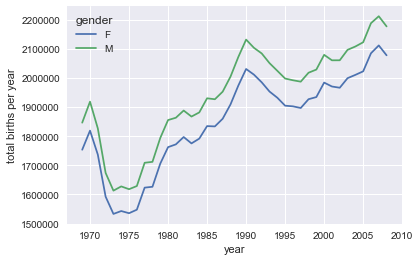

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

# See the annual trend in births by gender. 
# It appears that over the past 50 years male births have outnumbered female births by around 5%

#### Further data exploration

In [39]:
# This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution 
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
print(sig)

689.31


In [42]:
# filtering data
# get only middle 50% of data
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [43]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [45]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

# get day of week
births['dayofweek'] = births.index.dayofweek
births['dayofweek'].head()

1969-01-01    2
1969-01-01    2
1969-01-02    3
1969-01-02    3
1969-01-03    4
Name: dayofweek, dtype: int64

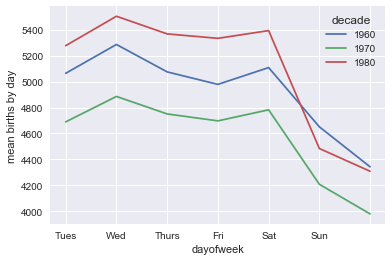

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [57]:
births.index

DatetimeIndex(['1969-01-01', '1969-01-01', '1969-01-02', '1969-01-02',
               '1969-01-03', '1969-01-03', '1969-01-04', '1969-01-04',
               '1969-01-05', '1969-01-05',
               ...
               '1988-12-27', '1988-12-27', '1988-12-28', '1988-12-28',
               '1988-12-29', '1988-12-29', '1988-12-30', '1988-12-30',
               '1988-12-31', '1988-12-31'],
              dtype='datetime64[ns]', length=14610, freq=None)

In [53]:
# let's plot mean number of births by the day of the year
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [54]:
# months and days into a date by associating them with a dummy year variable
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()


births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

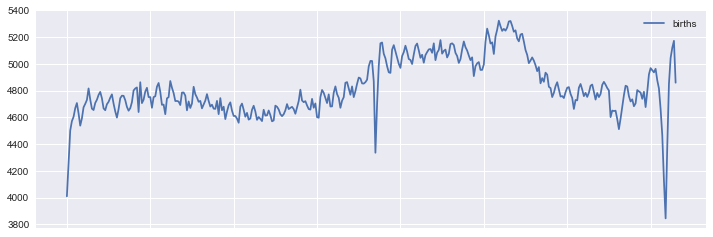

In [59]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

# dip in birthrate on US holidays (e.g., Independence Day, Labor Day, Thanksgiving, Christmas, New Year's Day)

## Vectorized String Operations

### Introducing Pandas String Operations

In [60]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [61]:
# In NumPy
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [62]:
# NumPy type error
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [63]:
# let's see how it works with Pandas
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [65]:
# skipping over any missing value
names.str.capitalize()


0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

### Tables of Pandas String Methods

In [66]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

#### Methods similar to Python string methods

In [67]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [68]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [69]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

#### Methods using regular expressions

In [70]:
# getting first name
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [104]:
# another way
monte.str.split().str.get(0)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [99]:
# using regex
# start and end with consonant
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

#### Miscellaneous methods

In [101]:
# same as df.str.slice(0, 3)
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [102]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [105]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


In [106]:
# get_dummies() routine lets quickly split-out these indicator variables into a DataFrame
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### Example: Recipe Database

In [112]:
# !curl -O http://openrecipes.s3.amazonaws.com/openrecipes.txt
# !mv openrecipes.txt recipeitems-latest.json

# using recipe examples

In [113]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print("ValueError:", e)

ValueError: Trailing data


In [115]:
# read the entire file into a Python array
with open('recipeitems-latest.json', 'r') as f:
    # Extract each line
    data = (line.strip() for line in f)
    # Reformat so each line is the element of a list
    data_json = "[{0}]".format(','.join(data))
# read the result as a JSON
recipes = pd.read_json(data_json)

In [116]:
recipes.shape

(1042, 9)

In [117]:
recipes.iloc[0]

cookTime                                                        PT
datePublished                                           2013-04-01
description      Got leftover Easter eggs?    Got leftover East...
image            http://static.thepioneerwoman.com/cooking/file...
ingredients      12 whole Hard Boiled Eggs\n1/2 cup Mayonnaise\...
name                                      Easter Leftover Sandwich
prepTime                                                     PT15M
recipeYield                                                      8
url              http://thepioneerwoman.com/cooking/2013/04/eas...
Name: 0, dtype: object

In [118]:
recipes.ingredients.str.len().describe()

count    1042.000000
mean      358.645873
std       187.332133
min        22.000000
25%       246.250000
50%       338.000000
75%       440.000000
max      3160.000000
Name: ingredients, dtype: float64

In [121]:
# recipe which has the longest ingredient list
recipes.name[np.argmax(recipes.ingredients.str.len())]

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


'A Nice Berry Pie'

In [122]:
# see how many of the recipes are for breakfast food
recipes.description.str.contains('[Bb]reakfast').sum()

11

In [133]:
# recipe which contains cinnamon ingredient
recipes.ingredients.str.contains('[Cc]innamon').sum()

79

In [134]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

0

#### A simple recipe recommender

In [135]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [136]:
import re

#  build a Boolean DataFrame consisting of True and False values, indicating whether this ingredient appears in the list
spice_df = pd.DataFrame(dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE))
                             for spice in spice_list))
spice_df.head()

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [143]:
spice_df.query('cumin == True').head()
# or
spice_df[spice_df['cumin'] == True].head()

,cumin,oregano,paprika,parsley,pepper,rosemary,sage,salt,tarragon,thyme
556,True,False,False,False,True,False,False,False,False,False
559,True,False,False,False,False,False,False,True,False,False
570,True,True,False,False,True,False,False,True,False,False
579,True,False,True,False,False,False,False,True,False,False
581,True,False,False,False,False,False,False,True,False,False


In [147]:
selection = spice_df.query('paprika')
len(selection)

16

In [149]:
# getting values from index
recipes.name[selection.index]

568                      Roasted Tomato Soup Recipe
579                  Butterscotch Calypso Bean Soup
583                    Bourbon Baked Sweet Potatoes
585                   Berry Beer Baked Beans Recipe
586                  Green Rice with Smoked Paprika
625     Borlotti Bean Mole with Roast Winter Squash
637                  Pappardelle with Spiced Butter
651           Lively Up Yourself Lentil Soup Recipe
664                   A Quartet of Compound Butters
691                              Feisty Green Beans
733                Vegetarian Split Pea Soup Recipe
773                    Broccoli Cheddar Soup Recipe
794                                     Magic Sauce
898                                Baked Egg Recipe
1010          Herb Jam with Olives and Lemon Recipe
1036                       Liptauer Cheese Crostini
Name: name, dtype: object

## Working with Time Series

### Dates and Times in Python

#### Native Python dates and times: datetime and dateutil

In [150]:
# using datetime
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [152]:
# using dateutil parser
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [153]:
date.strftime('%A')

'Saturday'

In [161]:
date.strftime('%D')

'07/04/15'

#### Typed arrays of times: NumPy's datetime64

In [170]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [163]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [164]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [165]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [166]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [169]:
np.datetime64('2015-07-04 12:59:59.50', 'D')

numpy.datetime64('2015-07-04')

#### Dates and times in pandas: best of both worlds

In [2]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [172]:
date.strftime('%A')

'Saturday'

In [173]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

In [174]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [175]:
# filter dates
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [177]:
# filter by year
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Pandas Time Series Data Structures


* For time stamps, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The associated Index structure is DatetimeIndex.

* For time Periods, Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.

* For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.


In [178]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [180]:
# Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [183]:
# A TimedeltaIndex is created when a date is subtracted from another
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

#### Regular sequences: pd.date_range()

In [184]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [185]:
# using period
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [186]:
# using hour freq (Datetime index)
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [187]:
# using month frequences (Period index)
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [189]:
# using hour frequences (Timedelta index)
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### Frequencies and Offsets
Need to see table of Pandas code

In [191]:
# each 2H30
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [192]:
# using pandas tseries offsets
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [194]:
pd.tseries.offsets.*?

In [196]:
from pandas.tseries.offsets import MonthBegin
pd.date_range('2015-07-01', periods=5, freq=MonthBegin())

DatetimeIndex(['2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01'],
              dtype='datetime64[ns]', freq='MS')

### Resampling, Shifting, and Windowing

In [ ]:
# !pip install pandas-datareader
from pandas_datareader import data
import time

# try to import data from google finances
for i in range(0, 300):
    
    time.sleep(5)
    
    try:
        goog = data.DataReader('F', start='2013', end='2016',
                       data_source='google')
        
        print("Attempt: ", i, " is a success!")
        break
    except:
        print("Attempt: ", i, " is not a success..")
    
goog.head()

/home/jbuisine/.pyenv/versions/3.6.5/envs/tensorflow/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


Attempt:  0  is not a success..
Attempt:  1  is not a success..
Attempt:  2  is not a success..
Attempt:  3  is not a success..
Attempt:  4  is not a success..
Attempt:  5  is not a success..
Attempt:  6  is not a success..
Attempt:  7  is not a success..
Attempt:  8  is not a success..
Attempt:  9  is not a success..
Attempt:  10  is not a success..
Attempt:  11  is not a success..
Attempt:  12  is not a success..
Attempt:  13  is not a success..
Attempt:  14  is not a success..
Attempt:  15  is not a success..
Attempt:  16  is not a success..
Attempt:  17  is not a success..
Attempt:  18  is not a success..
Attempt:  19  is not a success..
Attempt:  20  is not a success..
Attempt:  21  is not a success..
Attempt:  22  is not a success..
Attempt:  23  is not a success..
Attempt:  24  is not a success..
Attempt:  25  is not a success..
Attempt:  26  is not a success..
Attempt:  27  is not a success..
Attempt:  28  is not a success..
Attempt:  29  is not a success..
Attempt:  30  is not

Attempt:  245  is not a success..
Attempt:  246  is not a success..
Attempt:  247  is not a success..
Attempt:  248  is not a success..
Attempt:  249  is not a success..
Attempt:  250  is not a success..
Attempt:  251  is not a success..
Attempt:  252  is not a success..
Attempt:  253  is not a success..
Attempt:  254  is not a success..
Attempt:  255  is not a success..
Attempt:  256  is not a success..
Attempt:  257  is not a success..
Attempt:  258  is not a success..
Attempt:  259  is not a success..
Attempt:  260  is not a success..
Attempt:  261  is not a success..
Attempt:  262  is not a success..
Attempt:  263  is not a success..
Attempt:  264  is not a success..
Attempt:  265  is not a success..
Attempt:  266  is not a success..
Attempt:  267  is not a success..
Attempt:  268  is not a success..
Attempt:  269  is not a success..
Attempt:  270  is not a success..
Attempt:  271  is not a success..
Attempt:  272  is not a success..
Attempt:  273  is not a success..
Attempt:  274 

In [105]:
# Get data from other dataset
from pandas_datareader import data
from datetime import datetime

start = datetime(2004, 1, 1)

end = datetime(2016, 1, 1)
    
# OHLC and Volume data is available from Morningstar
morningstar = data.DataReader('F', 'morningstar', start, end)

# erase Symbol multi index
morningstar.reset_index(level=0, drop=True, inplace=True)
morningstar.head()

,Close,High,Low,Open,Volume
Date,,,,,
2004-01-01,16.06,16.06,15.99,15.99,0
2004-01-02,16.08,16.15,16.03,16.10,9030400
2004-01-05,16.59,16.65,16.33,16.37,19947100
2004-01-06,16.54,16.73,16.39,16.72,16729600
2004-01-07,16.99,17.02,16.45,16.58,13800200


In [106]:
morningstar = morningstar['Close']

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

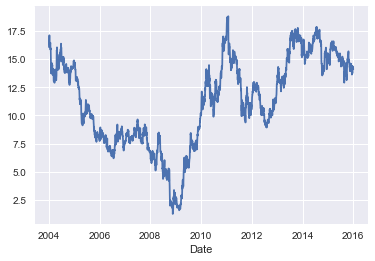

In [108]:
morningstar.plot();

#### Resampling and converting frequencies

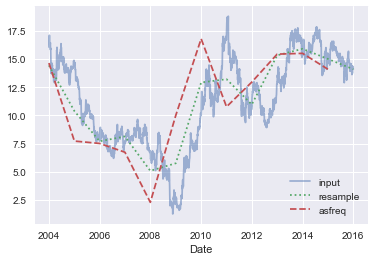

In [112]:
# BA 	 Business year end
morningstar.plot(alpha=0.5, style='-')
morningstar.resample('BA').mean().plot(style=':')
morningstar.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='lower right');

# at each point :
# resample reports the average of the previous year
# asfreq reports the value at the end of the year

Date
2004-01-01    16.06
2004-01-02    16.08
2004-01-05    16.59
2004-01-06    16.54
2004-01-07    16.99
2004-01-08    17.10
2004-01-09    16.56
2004-01-12    16.41
2004-01-13    16.28
2004-01-14    16.18
Name: Close, dtype: float64


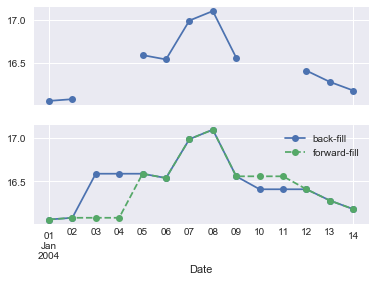

In [119]:
# the default for both methods is to leave the up-sampled points empty, that is, filled with NA values
fig, ax = plt.subplots(2, sharex=True) # specify number of plots
data = morningstar.iloc[:10]
print(data)

data.asfreq('D').plot(ax=ax[0], marker='o')

# replace NA with back or forward fill
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

#### Time-shifts

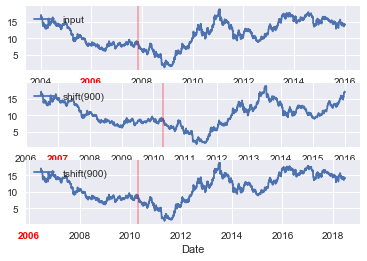

In [124]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
morningstar = morningstar.asfreq('D', method='pad')

morningstar.plot(ax=ax[0])
morningstar.shift(900).plot(ax=ax[1])
morningstar.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

# shift(900) shifts the data by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end)
# tshift(900) shifts the index values by 900 days.

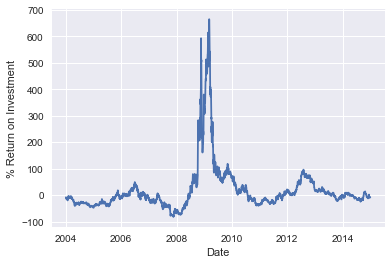

In [126]:
ROI = 100 * (morningstar.tshift(-365) / morningstar - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

#### Rolling windows

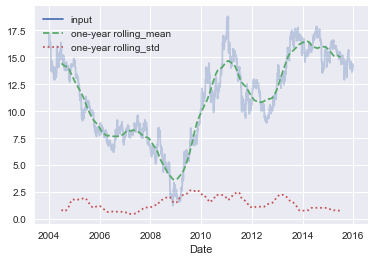

In [127]:
rolling = morningstar.rolling(365, center=True)

data = pd.DataFrame({'input': morningstar,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

### Example: Visualizing Seattle Bicycle Counts

In [128]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1370k    0 1370k    0     0   471k      0 --:--:--  0:00:02 --:--:--  471k


In [129]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [130]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [131]:
data.dropna().describe()

,West,East,Total
count,48856.000000,48856.000000,48856.000000
mean,54.440294,55.199218,109.639512
std,72.805279,79.947734,138.729253
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,59.000000
75%,71.000000,67.000000,143.000000
max,854.000000,717.000000,1165.000000


#### Visualizing the data

In [132]:
%matplotlib inline
import seaborn; seaborn.set()

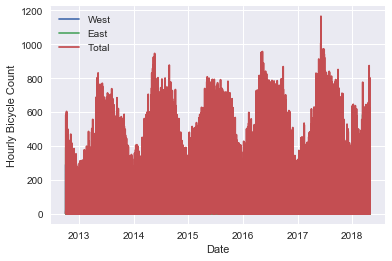

In [133]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

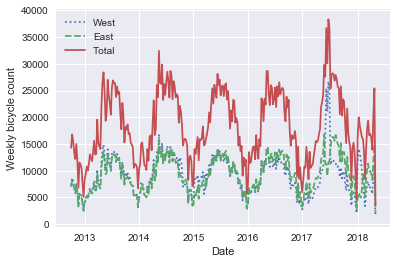

In [134]:
# resample by week
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

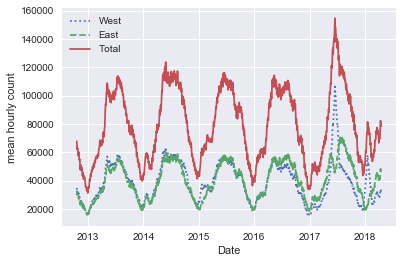

In [136]:
# utilizing the pd.rolling_mean() function. 
# a 30 day rolling mean of our data, making sure to center the window
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

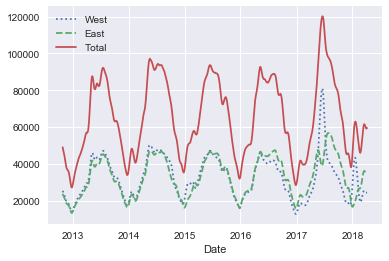

In [138]:
#get a smoother version of a rolling mean using a window function–for example, a Gaussian window
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

#### Digging into the data

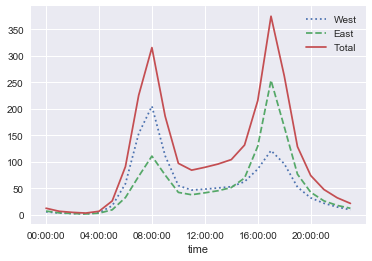

In [143]:
# getting model view of day
by_time = data.groupby(data.index.time).mean() # grouping by same date
hourly_ticks = 4 * 60 * 60 * np.arange(6) # each four hours
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

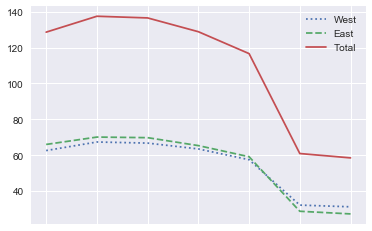

In [149]:
# getting model view by week
by_weekday = data.groupby(data.index.dayofweek).mean()
labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.index = labels
by_weekday.plot(style=[':', '--', '-']);

In [150]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

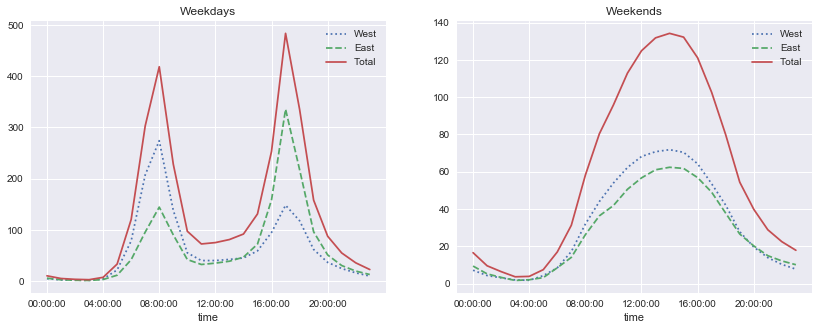

In [152]:
# getting information for weekdays and weekends
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);


## High-Performance Pandas: eval() and query()

### Motivating query() and eval(): Compound Expressions

In [153]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

1.92 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [154]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))

166 ms ± 6.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [155]:
mask = (x > 0.5) & (y < 0.5)

In [156]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In [161]:
# Numexpr evaluates the expression in a way that does not use full-sized temporary arrays
# and thus can be much more efficient than NumPy, especially for large arrays
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

# The Pandas eval() and query() tools that are conceptually similar, and depend on the Numexpr package

True

### pandas.eval() for Efficient Operations

In [162]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

In [163]:
# compute the sum of all four DataFrames using the typical Pandas approach
%timeit df1 + df2 + df3 + df4

112 ms ± 6.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [164]:
# faster than previous approach
%timeit pd.eval('df1 + df2 + df3 + df4')

108 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [166]:
# check it gives same result
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))

True

### Operations supported by pd.eval()

In [168]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                           for i in range(5))

#### Arithmetic operators

In [169]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

#### Comparison operators

In [170]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

#### Bitwise operators

In [171]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [173]:
# In addition, it supports the use of the literal and and or in Boolean expressions
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

#### Object attributes and indices

In [174]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

### DataFrame.eval() for Column-Wise Operations

In [175]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()


,A,B,C
0,0.061761,0.925463,0.997420
1,0.209863,0.280456,0.042148
2,0.738991,0.019046,0.715501
3,0.062857,0.516241,0.604588
4,0.204537,0.813392,0.244804


In [177]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)") # use . to access col
np.allclose(result1, result2)

True

In [178]:
# eval attached to df will use col names directly
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

#### Assignment in DataFrame.eval()

In [179]:
df.head()

,A,B,C
0,0.061761,0.925463,0.997420
1,0.209863,0.280456,0.042148
2,0.738991,0.019046,0.715501
3,0.062857,0.516241,0.604588
4,0.204537,0.813392,0.244804


In [180]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.061761,0.925463,0.997420,0.989777
1,0.209863,0.280456,0.042148,11.633339
2,0.738991,0.019046,0.715501,1.059450
3,0.062857,0.516241,0.604588,0.957840
4,0.204537,0.813392,0.244804,4.158143


In [181]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.061761,0.925463,0.997420,-0.865935
1,0.209863,0.280456,0.042148,-1.674903
2,0.738991,0.019046,0.715501,1.006210
3,0.062857,0.516241,0.604588,-0.749906
4,0.204537,0.813392,0.244804,-2.487117


#### Local variables in DataFrame.eval()

In [184]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

### DataFrame.query() Method

In [185]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]') # using pandas
np.allclose(result1, result2)

True

In [187]:
result2 = df.query('A < 0.5 and B < 0.5') # using dataframe directly
np.allclose(result1, result2)

True

In [189]:
# using local variables
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

### Performance: When to Use These Functions

In [190]:
x = df[(df.A < 0.5) & (df.B < 0.5)]

# equal to (in term of memory)

tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

In [191]:
df.values.nbytes

32000